### Problem 1 - Gradient Descent and Convergence Rate

1. The gradient descent updates with leaning rate epsilon :  $w^{(t+1)} = w^{(t)} - \epsilon \Phi (\Phi^T w^{(t)} - y)$.
2. Lamda max represents the largest eigenvalue of Hessian matrix and the convergence of gradient descent is guaranteed when epsilon (assume learning rate) is less than 2/lamda max. The Hessian for the loss is $H=\Phi \Phi^T $



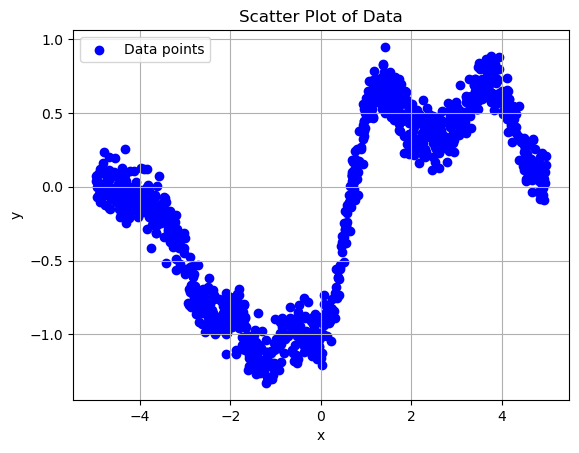

In [1]:
#Always visualize data
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.load("hw1_p1.npy")
x, y = data[:, 0], data[:, 1]

# Visualize the data
plt.scatter(x, y, color='blue', label="Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Data")
plt.grid(True)
plt.legend()
plt.show()


In [2]:
# Define Gaussian basis functions
def gaussian_basis(x, centers, sigma=0.25):
    
    return np.exp(-((x[:, None] - centers[None, :]) ** 2) / (2 * sigma ** 2))

# Define centers and create the feature matrix
M = 7
centers = np.array([1.25 * m - 3.75 for m in range(M)])
sigma = 0.25

Phi = gaussian_basis(x, centers, sigma)

# Verify Phi dimensions
print(f"Feature matrix Phi shape:", Phi.shape)


Feature matrix Phi shape: (1000, 7)


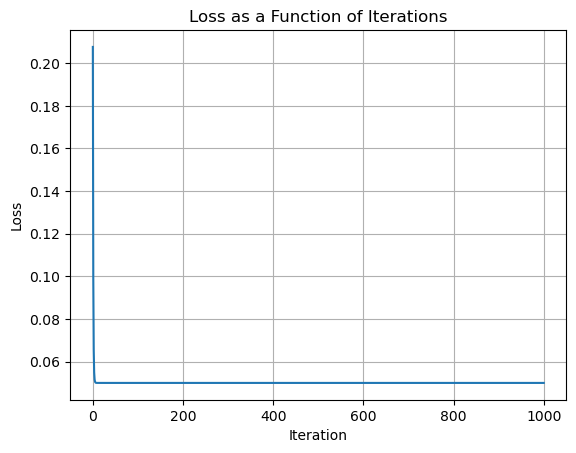

In [4]:
# Mean Squared Error loss
def mse_loss(Phi, w, y):

    residuals = Phi @ w - y
    return 0.5 * np.mean(residuals ** 2)

# Gradient descent implementation
def gradient_descent(Phi, y, w_init, epsilon, num_steps):
    
    w = w_init
    w_history = [w.copy()]
    loss_history = [mse_loss(Phi, w, y)]

    for step in range(num_steps):
        
        gradient = Phi.T @ (Phi @ w - y)

        w = w - epsilon * gradient

        w_history.append(w.copy())
        loss_history.append(mse_loss(Phi, w, y))

    return w_history, loss_history

# Initialize weights
w_init = np.zeros(Phi.shape[1])
epsilon = 0.01
num_steps = 1000

# Run gradient descent
w_history, loss_history = gradient_descent(Phi, y, w_init, epsilon, num_steps)

# Plot the loss over iterations
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss as a Function of Iterations")
plt.grid(True)
plt.show()


### Reflection on the chart
In above chart, we can observe that the lost function starts relatively high in the first itaretion but quickly decreases within the first steps, showing rapid progress towards the optimal solution.

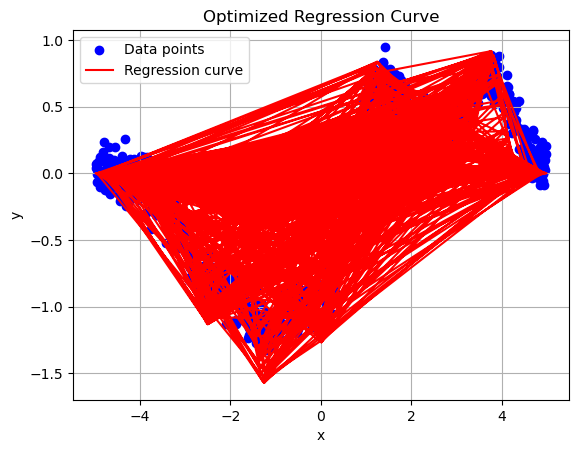

In [5]:
# Optimized weights
w_opt = w_history[-1]

# Compute predictions
y_pred = Phi @ w_opt

# Plot the data and regression curve
plt.scatter(x, y, color='blue', label="Data points")
plt.plot(x, y_pred, color='red', label="Regression curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Optimized Regression Curve")
plt.grid(True)
plt.show()


In [10]:
# Compute Hessian matrix
H = Phi.T @ Phi  # Hessian is Phi^T Phi

# Eigenvalues of the Hessian
eigenvalues = np.linalg.eigvals(H)
lambda_max = np.max(eigenvalues)  # Maximum eigenvalue
epsilon_upper_bound = 2 / lambda_max

print("Maximum eigenvalue of the Hessian:", lambda_max)
print("Theoretical upper bound for learning rate:", epsilon_upper_bound)


Maximum eigenvalue of the Hessian: 51.92017161633832
Theoretical upper bound for learning rate: 0.03852067390645213


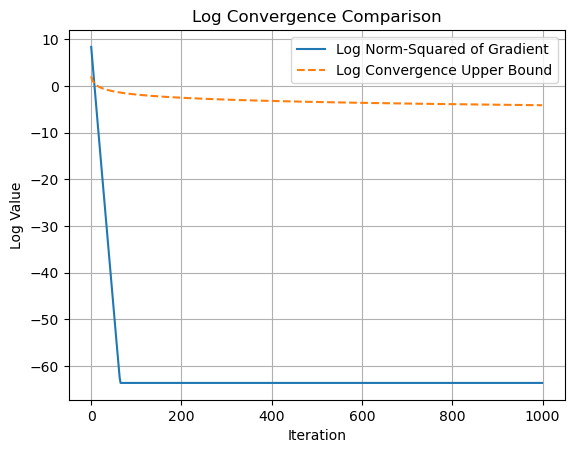

In [11]:
# Compute gradient norms
gradient_norms = [np.linalg.norm(Phi.T @ (Phi @ w - y)) ** 2 for w in w_history]

# Theoretical convergence bound
convergence_bound = [
    2 * lambda_max * (loss_history[0] - loss_history[-1]) / (t + 1)
    for t in range(1, len(loss_history))
]

# Logarithmic convergence plot
plt.plot(np.log(gradient_norms[1:]), label="Log Norm-Squared of Gradient")
plt.plot(np.log(convergence_bound), label="Log Convergence Upper Bound", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("Log Value")
plt.legend()
plt.title("Log Convergence Comparison")
plt.grid(True)
plt.show()


### Reflection on the chart

The blue line consistantly stays below the orange dashed line. It means that leaning rate, epsilon, adheres to the theoretical constraints.

### Problem 2

1. Here is my smallest MLP architecture: Input Layer (featuresOfX) + Hidden Layer (minimum#OfNeurons) + Output Layer (oneNeuronWithSigmoidActivation). Sigmoid Activation is used in both Hidden and Output Layers. Weights and baises are randomly initialized.

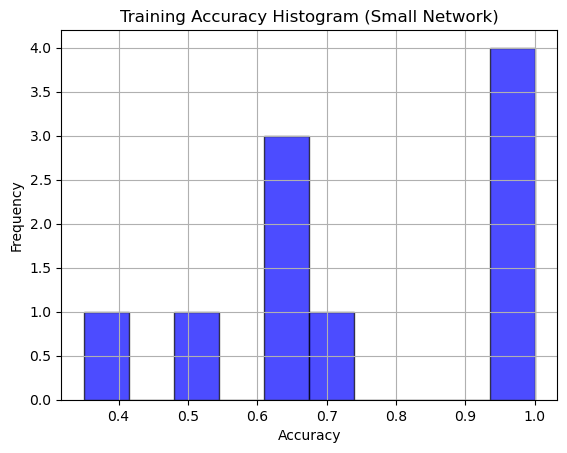

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = np.load('hw1_p2.npy')
X, y = data[:, :2], data[:, 2]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP class
class SimpleMLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros(hidden_dim)                    
        self.W2 = np.random.randn(hidden_dim, output_dim) 
        self.b2 = np.zeros(output_dim)                    

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, y_pred, learning_rate):
        m = X.shape[0]
        dz2 = y_pred - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0) / m

        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0) / m

        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y, y_pred, learning_rate)

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)

# Train and evaluate the model on 10 runs
accuracies = []
for run in range(10):
    np.random.seed(run)
    mlp = SimpleMLP(input_dim=2, hidden_dim=2, output_dim=1)
    mlp.train(X_train, y_train, epochs=1000, learning_rate=0.1)
    
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot histogram of accuracies
plt.hist(accuracies, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Training Accuracy Histogram (Small Network)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Reflection on the chart

The histogram of training accuracies suggests that with a small network size, the model fails to find a consistent solution across all runs. This inconsistency might be due to insufficient capacity or poor weight initialization in the minimal network. My analysis is that smaller network size has probabily insufficient capacity to campture complex functions or patterns in the data.

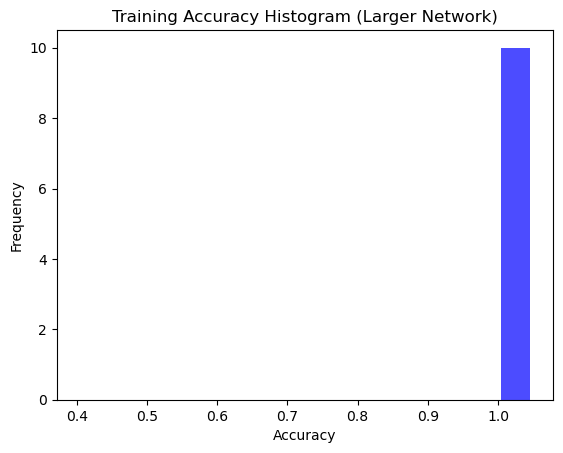

In [14]:
# Experiment: Train larger network (hidden size = 10 neurons) for 10 runs
hidden_size = 10
input_size = X_train.shape[1]
output_size = 1
epochs = 1000
learning_rate = 0.1

accuracies = []
for _ in range(10):
    # Convert y to column vector
    y_train_reshaped = y_train.reshape(-1, 1)
    y_test_reshaped = y_test.reshape(-1, 1)

    # Initialize and train MLP
    mlp = SimpleMLP(input_size, hidden_size, output_size)
    mlp.train(X_train, y_train_reshaped, epochs, learning_rate)
    
    # Evaluate on test set
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test_reshaped, y_pred)
    accuracies.append(acc)

# Plot histogram of accuracies
plt.hist(accuracies, bins=np.arange(0.4, 1.1, 0.05), color='blue', alpha=0.7, rwidth=0.85)
plt.title("Training Accuracy Histogram (Larger Network)")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()


### Reflection on the chart

In contrast, for the larger network, the histogram demonstrates perfect training accuracy (1.0) for all 10 runs. This indicates that increasing the hidden layer size provides sufficient capacity to model the data successfully. The larger network is also more robust to weight initialization variability.

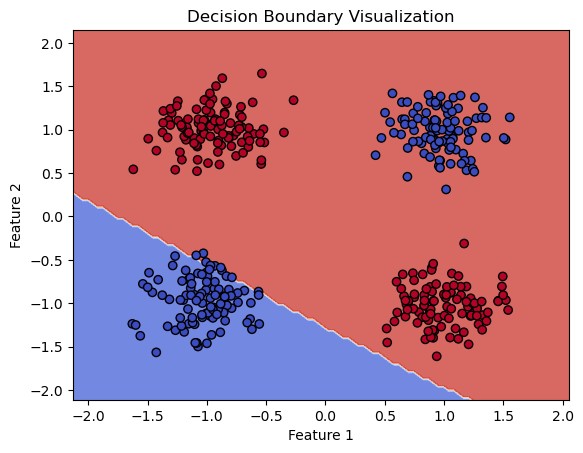

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example of assigning model parameters
model = {
    'W1': np.random.rand(2, hidden_size),
    'W2': np.random.rand(hidden_size, 1),
    'b1': np.random.rand(hidden_size),    
    'b2': np.random.rand(1)               
}


# Generate a grid of points spanning the dataset range
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten the grid and prepare input
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute predictions for the grid points
predictions = []
for pt in grid:
    z1 = np.dot(pt, model['W1']) + model['b1']
    h = np.tanh(z1)
    z2 = np.dot(h, model['W2']) + model['b2']
    predictions.append(1 if z2 > 0 else 0)

predictions = np.array(predictions).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, predictions, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title('Decision Boundary Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Reflection on the chart

We can see that the the decision boundary learned by the model which uses a simple forward pass, with fixed model prameters. It shows how well the model seperates the space into different classes such as 0 and 1.

Epoch 0, Loss: 1.0116
Epoch 100, Loss: 0.1475
Epoch 200, Loss: 0.0706
Epoch 300, Loss: 0.0456
Epoch 400, Loss: 0.0335
Epoch 500, Loss: 0.0264
Epoch 600, Loss: 0.0218
Epoch 700, Loss: 0.0185
Epoch 800, Loss: 0.0160
Epoch 900, Loss: 0.0141


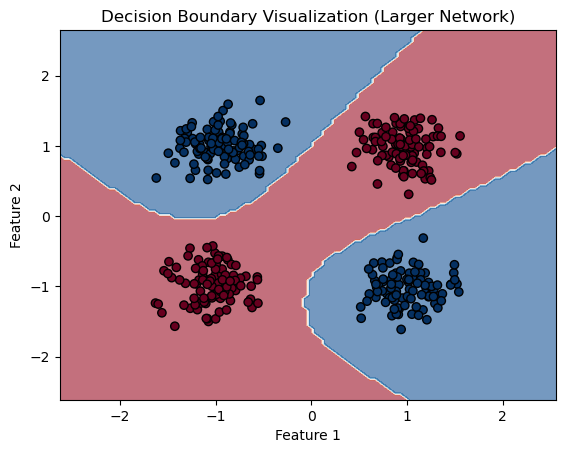

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to initialize a larger network
def initialize_model_large():
    input_dim = 2  
    hidden_dim = 10
    output_dim = 1 
    np.random.seed(42)
    
    # Random weight and bias initialization
    model = {
        "W1": np.random.randn(input_dim, hidden_dim),
        "b1": np.random.randn(hidden_dim),
        "W2": np.random.randn(hidden_dim, output_dim),
        "b2": np.random.randn(output_dim)
    }
    return model

# Function to compute forward pass
def forward_pass_large(X, model):
    z1 = np.dot(X, model['W1']) + model['b1']
    h = np.tanh(z1) 
    z2 = np.dot(h, model['W2']) + model['b2']
    y_pred = 1 / (1 + np.exp(-z2))  
    return y_pred, h

# Function for gradient descent with updated model
def train_model_large(X_train, y_train, model, learning_rate=0.1, epochs=1000):
    for epoch in range(epochs):
        y_pred, h = forward_pass_large(X_train, model)
        
        loss = -(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred)).mean()
   
        dz2 = y_pred - y_train
        dW2 = np.dot(h.T, dz2) / X_train.shape[0]
        db2 = np.sum(dz2, axis=0) / X_train.shape[0]
        
        dh = np.dot(dz2, model['W2'].T)
        dz1 = dh * (1 - h ** 2)  # Derivative of tanh
        dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]
        db1 = np.sum(dz1, axis=0) / X_train.shape[0]
        
        model['W2'] -= learning_rate * dW2
        model['b2'] -= learning_rate * db2
        model['W1'] -= learning_rate * dW1
        model['b1'] -= learning_rate * db1

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return model

# Function to plot decision boundary
def plot_decision_boundary_large(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred, _ = forward_pass_large(grid, model)
    y_pred = (y_pred > 0.5).astype(int)
    y_pred = y_pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, alpha=0.6, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k", cmap=plt.cm.RdBu)
    plt.title("Decision Boundary Visualization (Larger Network)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Load your data
data = np.load('hw1_p2.npy', allow_pickle=True)
X, y = data[:, :2], data[:, 2:]
y = y.reshape(-1, 1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the larger model
model_large = initialize_model_large()
model_large = train_model_large(X_train, y_train, model_large)

# Plot the decision boundary for the larger network
plot_decision_boundary_large(X, y, model_large)


### Reflection on the chart

The decision boundary is more intricate and closely matches the data distribution. We can see well-separated clusters for the two classes, with minimal overlap or misclassification at the edges. This indicates that the larger network has sufficient capacity to effectively learn the patterns in the data.



### Problem 3

In [18]:
import numpy as np

# Load the data files
data_file = "hw1_p3.npy"
ground_truth_file = "hw1_p3_gt.npy"

# Load data and ground truth
try:
    # Load the files
    data = np.load(data_file, allow_pickle=True)
    ground_truth = np.load(ground_truth_file, allow_pickle=True)

    # Check dimensionality
    print("Data and Ground Truth Overview")
    print("-" * 40)
    print(f"Data shape: {data.shape}")
    print(f"Ground truth shape: {ground_truth.shape}\n")

    # Display a preview of the data's structure (showing first 5 rows per dataset)
    print("Sample Data (Top 5 Rows):")
    print("-" * 40)
    for idx, row in enumerate(data[:5]):
        print(f"Dataset {idx + 1}:")
        print(row[:5], "\n")  # Show top 5 rows per dataset

    # Display a preview of the ground truth structure
    print("Sample Ground Truth (Top 5 Rows):")
    print("-" * 40)
    print(ground_truth[:, :5])  # Show the first 5 columns

except FileNotFoundError:
    print(f"Files not found. Please ensure {data_file} and {ground_truth_file} are in the same directory.")
except Exception as e:
    print(f"An error occurred: {e}")


Data and Ground Truth Overview
----------------------------------------
Data shape: (10, 50, 2)
Ground truth shape: (2, 1000)

Sample Data (Top 5 Rows):
----------------------------------------
Dataset 1:
[[-0.41915357  0.2051531 ]
 [-0.17143428  0.6831583 ]
 [-1.8750167  -0.14774029]
 [ 1.1502165   0.6290288 ]
 [-2.860527   -0.27653793]] 

Dataset 2:
[[-3.924172    1.3403729 ]
 [ 4.8286824   0.10795499]
 [-3.516522    0.9022625 ]
 [ 0.9563023   0.4143792 ]
 [-1.3660979   0.36516058]] 

Dataset 3:
[[-0.12512386  0.5227522 ]
 [ 2.935871   -0.61169744]
 [ 4.2585697   0.16233578]
 [ 1.1050922   0.67994654]
 [-2.969526   -0.06869838]] 

Dataset 4:
[[-4.6707726   0.1955268 ]
 [ 0.56111395  0.46886888]
 [-2.4171586  -0.5920125 ]
 [-0.31344414  0.26910198]
 [-1.1041015   0.1231865 ]] 

Dataset 5:
[[-4.970727    0.08242922]
 [ 2.7116203  -0.22015437]
 [ 1.070388    0.06496543]
 [ 3.0170112  -0.3768731 ]
 [-0.6709814   0.6042685 ]] 

Sample Ground Truth (Top 5 Rows):
---------------------------

### Reflection on the data dementionality

Data shape: (10, 50, 2) indicates there are 10 datasets, each containing 50 data points with 2 values per point (likely x and y).

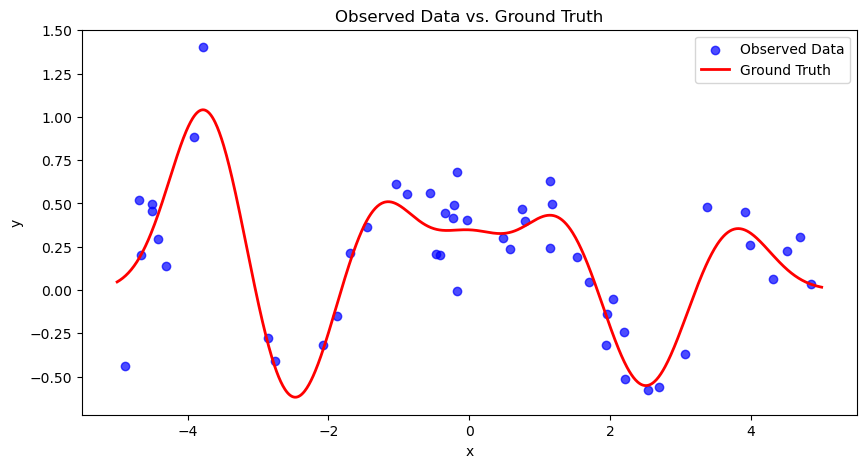

In [19]:
import matplotlib.pyplot as plt

# Parse x and y values from the dataset
dataset_index = 0  # Adjust to view other datasets if needed
x_values = data[dataset_index, :, 0]
y_values = data[dataset_index, :, 1]

# Ground truth values
ground_truth_x = ground_truth[0, :]
ground_truth_y = ground_truth[1, :]

# Visualize the first dataset
plt.figure(figsize=(10, 5))
plt.scatter(x_values, y_values, label="Observed Data", color="blue", alpha=0.7)
plt.plot(ground_truth_x, ground_truth_y, label="Ground Truth", color="red", linewidth=2)
plt.title("Observed Data vs. Ground Truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### Reflection on the chart

The blue dots which are observed data points scatter around the red curve, highlighting the presence of noise. Inspite of the noise, the general trend of the observed data aligns well with the ground truth.

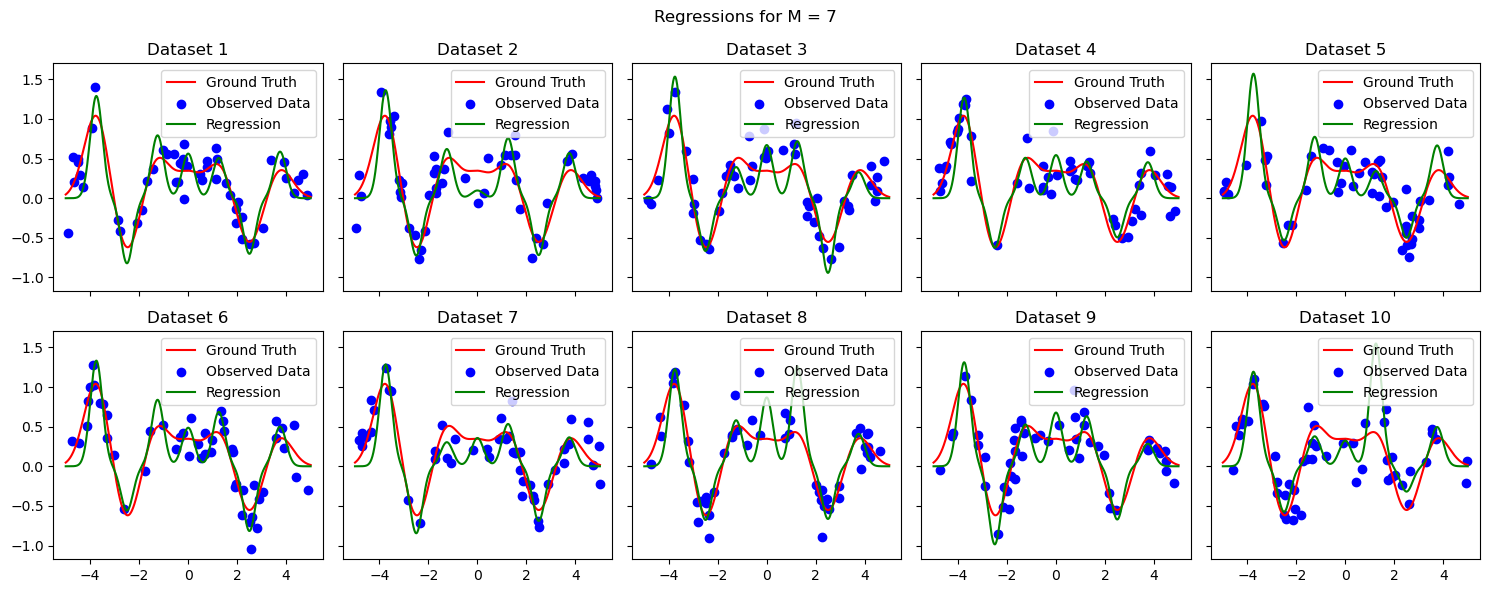

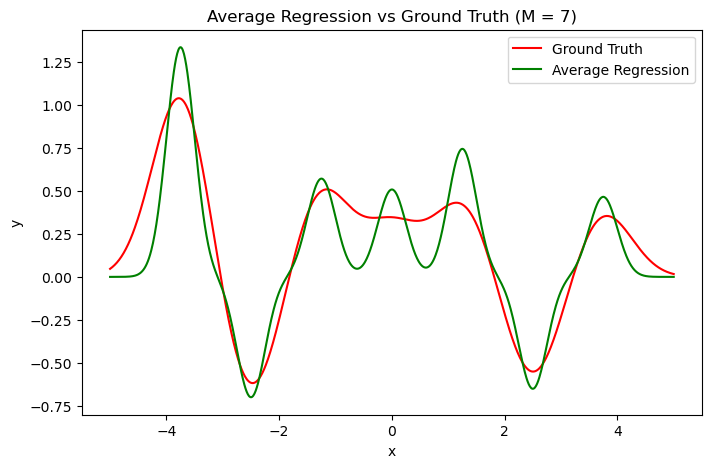

Bias2: 0.02936459146440029
Variance: 0.012152520939707756
MSE: 0.04151711240410805


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load data and ground truth
data_file = "hw1_p3.npy"
ground_truth_file = "hw1_p3_gt.npy"

# Load files
data = np.load(data_file, allow_pickle=True)
ground_truth = np.load(ground_truth_file, allow_pickle=True)

# Extract x and y values from the data
num_datasets = data.shape[0]  # Number of datasets
x_values = [dataset[:, 0] for dataset in data]  # x-values from each dataset
y_values = [dataset[:, 1] for dataset in data]  # y-values from each dataset

# Ground truth values
x_gt = ground_truth[0]  # x-values (ground truth)
y_gt = ground_truth[1]  # y-values (ground truth)

# Define parameters
M = 7  # Number of basis functions
mu = np.linspace(-5, 5, M+2)[1:-1]  # Centers for Gaussian basis functions
s = 2 / (M + 1)  # Scaling parameter for Gaussians

# Define the Gaussian basis function
def phi(x, mu, s):
    return np.exp(-0.5 * ((x - mu) / s) ** 2)

# Build the design matrix for given x-values
def build_design_matrix(x, mu, s):
    return np.vstack([phi(x, m, s) for m in mu]).T

# Solve regression for each dataset
regressions = []  # Store regression outputs for all datasets

for i in range(num_datasets):
    x = x_values[i]
    y = y_values[i]

    # Build the design matrix
    Phi = build_design_matrix(x, mu, s)

    # Solve for weights using the normal equation
    w = np.linalg.pinv(Phi) @ y

    # Predict on ground truth x-values
    Phi_gt = build_design_matrix(x_gt, mu, s)
    y_pred = Phi_gt @ w
    regressions.append(y_pred)

# Calculate average regression f_bar
f_bar = np.mean(regressions, axis=0)

# Calculate bias, variance, and MSE
bias_squared = np.mean((f_bar - y_gt) ** 2)
variances = np.mean([np.mean((y_pred - f_bar) ** 2) for y_pred in regressions])
mse = bias_squared + variances

# Plot results
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)
axes = axes.ravel()

for i in range(num_datasets):
    axes[i].plot(x_gt, y_gt, label="Ground Truth", color="red")
    axes[i].scatter(x_values[i], y_values[i], label="Observed Data", color="blue")
    axes[i].plot(x_gt, regressions[i], label="Regression", color="green")
    axes[i].set_title(f"Dataset {i+1}")
    axes[i].legend()

fig.suptitle("Regressions for M = 7")
plt.tight_layout()
plt.show()

# Plot average regression vs ground truth
plt.figure(figsize=(8, 5))
plt.plot(x_gt, y_gt, label="Ground Truth", color="red")
plt.plot(x_gt, f_bar, label="Average Regression", color="green")
plt.title("Average Regression vs Ground Truth (M = 7)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Print bias, variance, and MSE
print(f"Bias2: {bias_squared}")
print(f"Variance: {variances}")
print(f"MSE: {mse}")


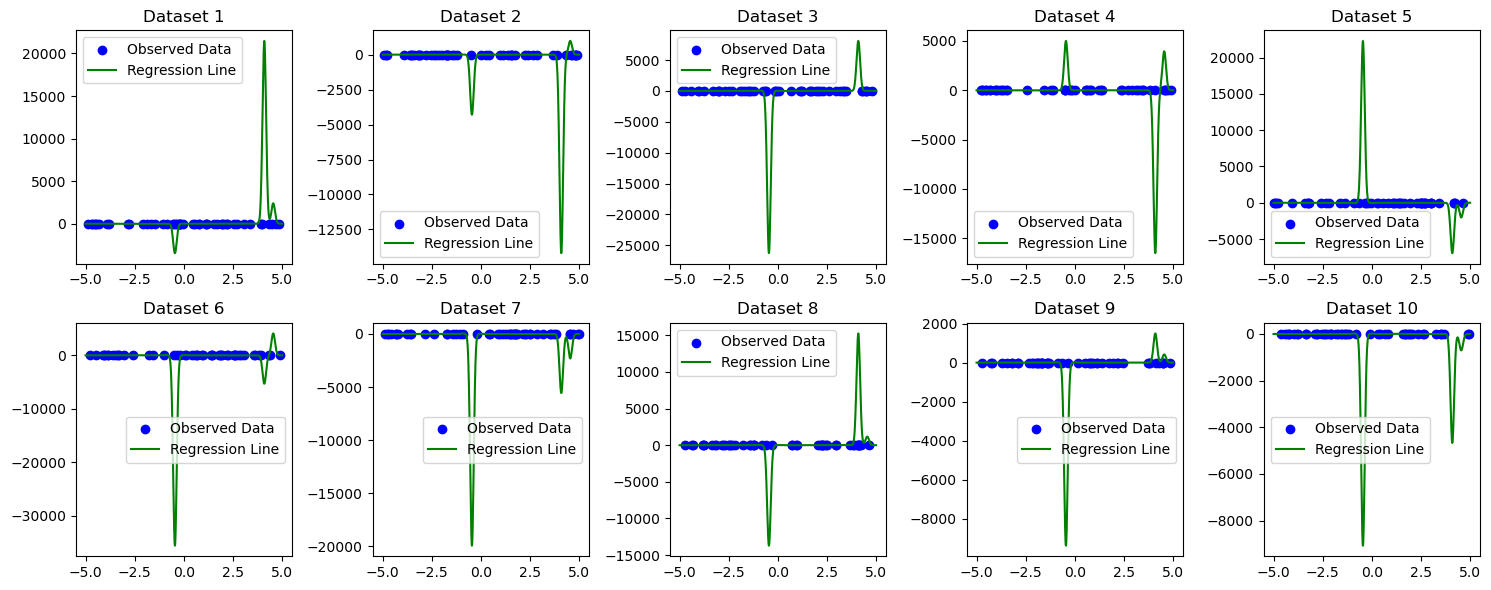

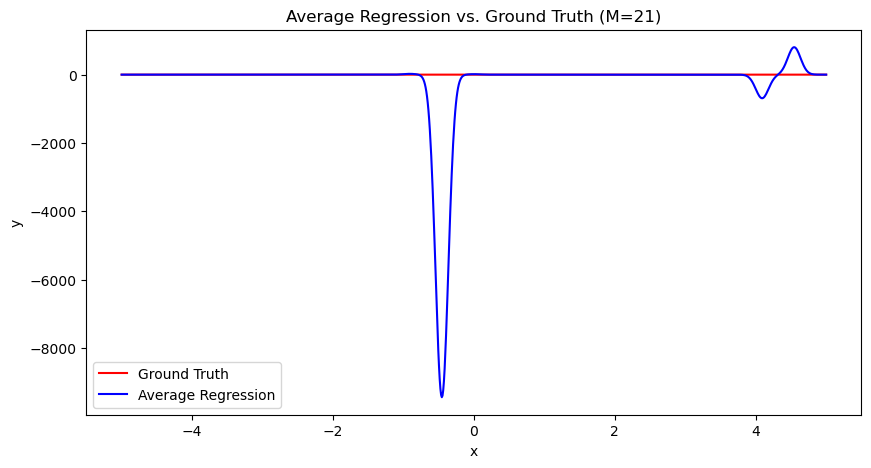

Bias for M=21: 839473792.0
Variance for M=21: 25245166073.30314
Mean squared error (MSE) for M=21: 26084639855.830982


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
M = 21  # Higher number of basis functions for overparameterization
mu = np.linspace(-5, 5, M+2)[1:-1]  # Equally spaced basis centers
s = 2 / (M + 1)  # Basis width

# Ground truth x-values
x_ground_truth = ground_truth[0]

# Compute design matrices and regression for each dataset
biases = []
variances = []
mse_list = []

predictions = []

for i in range(data.shape[0]):
    X = data[i, :, 0]
    y = data[i, :, 1]
    
    # Construct the design matrix Phi for training data
    Phi = np.exp(-0.5 * ((X[:, None] - mu[None, :]) / s) ** 2)
    
    # Solve the regression weights using closed-form solution
    w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y
    
    # Predict on training input
    f_pred = Phi @ w
    predictions.append(f_pred)
    
    # Construct the design matrix for ground truth x-values
    Phi_gt = np.exp(-0.5 * ((x_ground_truth[:, None] - mu[None, :]) / s) ** 2)
    
    # Predict on ground truth input
    f_true_pred = Phi_gt @ w
    
    # Calculate bias and variance
    f_true = ground_truth[1]  # Actual ground truth
    bias = np.mean((np.mean(f_true_pred) - f_true) ** 2)
    variance = np.var(f_true_pred)
    biases.append(bias)
    variances.append(variance)
    mse = bias + variance
    mse_list.append(mse)

# Average regression over ground truth x-values
average_regression = np.mean([np.exp(-0.5 * ((x_ground_truth[:, None] - mu[None, :]) / s) ** 2) @ np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y for X, y in zip(data[:, :, 0], data[:, :, 1])], axis=0)

# Visualization: Regressions on observed datasets
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i in range(10):
    X = data[i, :, 0]
    y = data[i, :, 1]
    axes[i].scatter(X, y, color="blue", label="Observed Data")
    axes[i].plot(x_ground_truth, np.exp(-0.5 * ((x_ground_truth[:, None] - mu[None, :]) / s) ** 2) @ np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y, color="green", label="Regression Line")
    axes[i].set_title(f"Dataset {i+1}")
    axes[i].legend()
    
plt.tight_layout()
plt.show()

# Plot average regression
plt.figure(figsize=(10, 5))
plt.plot(ground_truth[0], ground_truth[1], color="red", label="Ground Truth")
plt.plot(ground_truth[0], average_regression, color="blue", label="Average Regression")
plt.title("Average Regression vs. Ground Truth (M=21)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Report bias and variance
mean_bias = np.mean(biases)
mean_variance = np.mean(variances)
print(f"Bias for M=21: {mean_bias}")
print(f"Variance for M=21: {mean_variance}")
print(f"Mean squared error (MSE) for M=21: {np.mean(mse_list)}")


### Reflection on chart

The near-zero bias for M=21 suggests that the regression model is highly flexible and likely overfitting the data. The blue points appearing close to y=0 are likely caused by normalization issues or excessively large weight values, which produce near-zero interpolated results in the design matrix. This poor generalization occurs because the large number of parameters (21) compared to just 10 data points makes the design matrix (ΦTΦ) ill-conditioned, leading to inaccuracies in computing the inverse during the weight calculation.

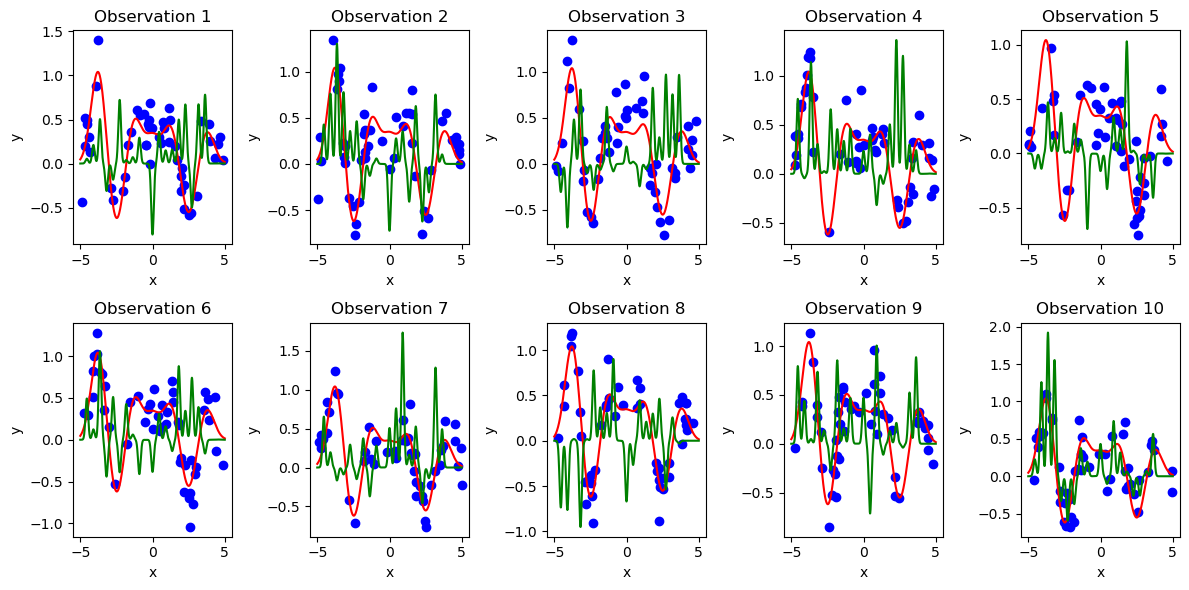

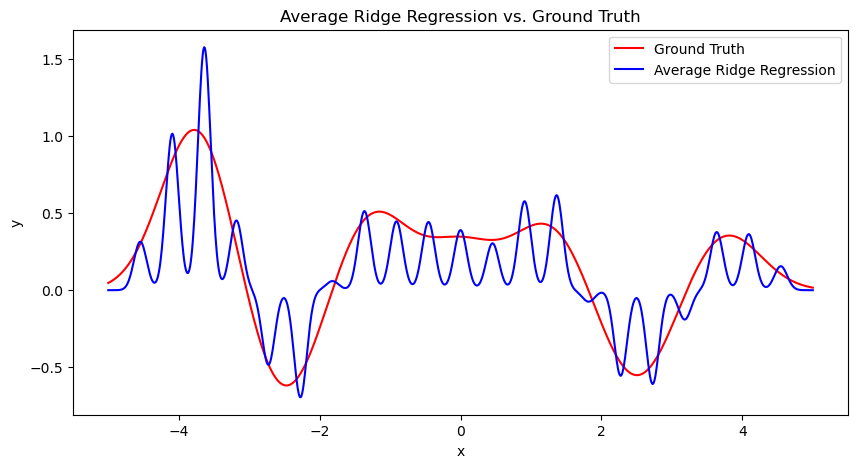

Bias^2 for Ridge Regression (M = 21, λ = 0.1): 0.06307252212763556
Variance for Ridge Regression (M = 21, λ = 0.1): 0.03047265465443245
Mean Squared Error (MSE): 0.09354517678206802


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Regularization parameter
lambda_reg = 0.1

# Recompute Phi matrix for M = 21
M = 21
mu = np.linspace(-5, 5, M + 2)[1:-1]
s = 2 / (M + 1)

# Ridge Regression weights computation
def ridge_regression(Phi, y, lambda_reg):
    identity_matrix = np.eye(Phi.shape[1])
    return np.linalg.inv(Phi.T @ Phi + lambda_reg * identity_matrix) @ Phi.T @ y

# Compute Phi matrix and perform regression for all 10 observations
predictions_ridge = []
for obs in data:
    x_obs = obs[:, 0]
    y_obs = obs[:, 1]
    Phi = np.exp(-(x_obs[:, None] - mu[None, :]) ** 2 / (2 * s ** 2))
    w_ridge = ridge_regression(Phi, y_obs, lambda_reg)
    predictions_ridge.append((Phi @ w_ridge).flatten())

# Generate plots for individual regressions
plt.figure(figsize=(12, 6))
x_obs_grid = ground_truth[0]
Phi_grid = np.exp(-(x_obs_grid[:, None] - mu[None, :]) ** 2 / (2 * s ** 2))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.scatter(data[i][:, 0], data[i][:, 1], color="blue", label="Data points")
    plt.plot(ground_truth[0], ground_truth[1], color="red", label="Ground Truth")
    plt.plot(ground_truth[0], Phi_grid @ ridge_regression(Phi, data[i][:, 1], lambda_reg), 
             color="green", label="Ridge Regression")
    plt.title(f"Observation {i+1}")
    plt.xlabel("x")
    plt.ylabel("y")
plt.tight_layout()
plt.show()

# Average regression
average_ridge_reg = np.mean(
    [Phi_grid @ ridge_regression(np.exp(-(obs[:, 0][:, None] - mu[None, :]) ** 2 / (2 * s ** 2)), 
                                obs[:, 1], lambda_reg)
     for obs in data], axis=0)

# Plot average regression vs. ground truth
plt.figure(figsize=(10, 5))
plt.plot(ground_truth[0], ground_truth[1], color="red", label="Ground Truth")
plt.plot(ground_truth[0], average_ridge_reg, color="blue", label="Average Ridge Regression")
plt.title("Average Ridge Regression vs. Ground Truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Bias and Variance calculations
bias_ridge = np.mean((average_ridge_reg - ground_truth[1]) ** 2)
variance_ridge = np.mean(
    np.var([Phi_grid @ ridge_regression(np.exp(-(obs[:, 0][:, None] - mu[None, :]) ** 2 / (2 * s ** 2)), obs[:, 1], lambda_reg) for obs in data], axis=0)
)
mse_ridge = bias_ridge + variance_ridge

print(f"Bias^2 for Ridge Regression (M = 21, λ = {lambda_reg}): {bias_ridge}")
print(f"Variance for Ridge Regression (M = 21, λ = {lambda_reg}): {variance_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")


### Reflection on the chart

show that Ridge Regression significantly reduces overfitting while balancing bias and variance compared to the unregularized solution for 𝑀 = 21. The regression curves are smoother and better aligned with the ground truth curve, showing that the regularized model generalizes better across observations. The average regression aligns more closely with the ground truth compared to the unregularized case, reflecting better generalization.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load the dataset
import pickle
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)
X_train, y_train, X_test, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']

# Define the MLP architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1000, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model, optimizer, and loss function
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
train_accs, test_accs = [], []
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.FloatTensor(X_train))
    loss = criterion(outputs, torch.LongTensor(y_train))
    loss.backward()
    optimizer.step()
    
    # Calculate training accuracy
    _, predicted = torch.max(outputs.data, 1)
    train_acc = (predicted == torch.LongTensor(y_train)).sum().item() / len(y_train)
    train_accs.append(train_acc)
    
    # Calculate test accuracy
    model.eval()
    test_outputs = model(torch.FloatTensor(X_test))
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_acc = (test_predicted == torch.LongTensor(y_test)).sum().item() / len(y_test)
    test_accs.append(test_acc)

# Plot training and test accuracy
plt.plot(range(num_epochs), train_accs, label='Training Accuracy')
plt.plot(range(num_epochs), test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate number of parameters
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {num_params}")

# Generalization to test data
generalization = test_accs[-1]
print(f"Test accuracy after training: {generalization}")


TypeError: list indices must be integers or slices, not str

In [6]:
import pickle

with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

print(type(data))  # Check the type of data
print(len(data))   # Check the length of data (number of elements)
print(data[0])     # Print the first element to understand its structure


<class 'list'>
4
tensor([[1.2226e-07, 1.0219e-07, 8.5323e-08,  ..., 2.0814e-07, 1.7449e-07,
         1.4613e-07],
        [7.0194e-01, 7.1345e-01, 7.2480e-01,  ..., 6.6689e-01, 6.7861e-01,
         6.9031e-01],
        [2.0612e-32, 1.4071e-32, 9.5962e-33,  ..., 6.4404e-32, 4.4098e-32,
         3.0164e-32],
        ...,
        [8.8892e-01, 8.7306e-01, 8.5762e-01,  ..., 9.3846e-01, 9.2169e-01,
         9.0515e-01],
        [1.1242e-06, 9.5193e-07, 8.0525e-07,  ..., 1.8405e-06, 1.5632e-06,
         1.3263e-06],
        [6.4493e-01, 6.3967e-01, 6.3395e-01,  ..., 6.5760e-01, 6.5391e-01,
         6.4968e-01]])


In [7]:
print(type(data))
print(len(data))       # Check the length of the list
print(type(data[0]))   # Check the type of the first element
print(data[0].shape)   # Check the shape of the first element (tensor)


<class 'list'>
4
<class 'torch.Tensor'>
torch.Size([50, 1000])


Index 0: Type: <class 'torch.Tensor'>, Shape: torch.Size([50, 1000])
Index 1: Type: <class 'torch.Tensor'>, Shape: torch.Size([50])
Index 2: Type: <class 'torch.Tensor'>, Shape: torch.Size([200, 1000])
Index 3: Type: <class 'torch.Tensor'>, Shape: torch.Size([200])
Epoch [1/100], Loss: 0.7080, Train Accuracy: 0.3000, Test Accuracy: 0.4250
Epoch [2/100], Loss: 0.6485, Train Accuracy: 0.6200, Test Accuracy: 0.4250
Epoch [3/100], Loss: 0.6107, Train Accuracy: 0.7000, Test Accuracy: 0.4250
Epoch [4/100], Loss: 0.5831, Train Accuracy: 0.7000, Test Accuracy: 0.4350
Epoch [5/100], Loss: 0.5604, Train Accuracy: 0.7000, Test Accuracy: 0.4450
Epoch [6/100], Loss: 0.5397, Train Accuracy: 0.7200, Test Accuracy: 0.4500
Epoch [7/100], Loss: 0.5200, Train Accuracy: 0.7200, Test Accuracy: 0.4500
Epoch [8/100], Loss: 0.5005, Train Accuracy: 0.7200, Test Accuracy: 0.4600
Epoch [9/100], Loss: 0.4807, Train Accuracy: 0.7200, Test Accuracy: 0.4900
Epoch [10/100], Loss: 0.4609, Train Accuracy: 0.7600, Test 

C:\Users\adams\AppData\Local\Temp\ipykernel_32416\709052875.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\709052875.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\709052875.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(data[2], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\

Epoch [63/100], Loss: 0.0271, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [64/100], Loss: 0.0260, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [65/100], Loss: 0.0250, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [66/100], Loss: 0.0240, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [67/100], Loss: 0.0231, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [68/100], Loss: 0.0222, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [69/100], Loss: 0.0214, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [70/100], Loss: 0.0206, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [71/100], Loss: 0.0199, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [72/100], Loss: 0.0192, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [73/100], Loss: 0.0185, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [74/100], Loss: 0.0179, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [75/100], Loss: 0.0173, Train Accuracy: 1.0000, Test Accuracy: 0.6500
Epoch [76/10

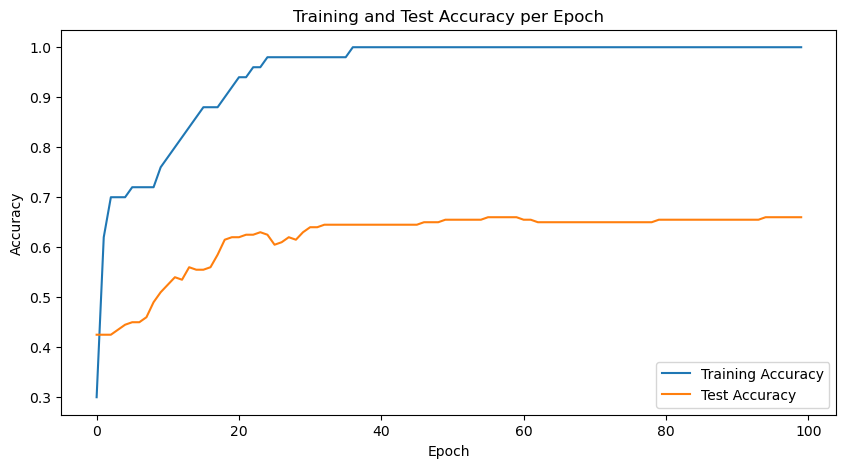

Total number of parameters: 128386


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

# Load the dataset
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

# Checking the structure of data to ensure proper indexing
for i, item in enumerate(data):
    print(f'Index {i}: Type: {type(item)}, Shape: {item.shape if isinstance(item, torch.Tensor) else len(item)}')

# Assuming the dataset structure:
# data[0] -> X_train, data[1] -> y_train, data[2] -> X_test, data[3] -> y_test

X_train = torch.tensor(data[0], dtype=torch.float32)
y_train = torch.tensor(data[1], dtype=torch.long)
X_test = torch.tensor(data[2], dtype=torch.float32)
y_test = torch.tensor(data[3], dtype=torch.long)

# Define the Multi-Layer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_dim = X_train.shape[1]  # Feature dimension
hidden_dim = 128  # You can adjust this
output_dim = 2  # Binary classification

# Initialize the model
model = MLP(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
train_acc_list = []
test_acc_list = []

for epoch in range(num_epochs):
    # Forward pass and loss calculation
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Compute training accuracy
    _, predicted = torch.max(outputs.data, 1)
    train_acc = (predicted == y_train).sum().item() / y_train.size(0)
    train_acc_list.append(train_acc)
    
    # Compute test accuracy
    test_outputs = model(X_test)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_acc = (test_predicted == y_test).sum().item() / y_test.size(0)
    test_acc_list.append(test_acc)
    
    # Print training progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot training and test accuracies
plt.figure(figsize=(10,5))
plt.plot(range(num_epochs), train_acc_list, label='Training Accuracy')
plt.plot(range(num_epochs), test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy per Epoch')
plt.show()

# Number of parameters in the model
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')


C:\Users\adams\AppData\Local\Temp\ipykernel_32416\4278449071.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\4278449071.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\4278449071.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(data[2], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_324

Epoch [1/100], Loss: 0.6967, Train Accuracy: 0.4800, Test Accuracy: 0.4600
Epoch [2/100], Loss: 0.6130, Train Accuracy: 0.6800, Test Accuracy: 0.4550
Epoch [3/100], Loss: 0.5701, Train Accuracy: 0.6800, Test Accuracy: 0.4350
Epoch [4/100], Loss: 0.5439, Train Accuracy: 0.7000, Test Accuracy: 0.4450
Epoch [5/100], Loss: 0.5210, Train Accuracy: 0.7000, Test Accuracy: 0.4400
Epoch [6/100], Loss: 0.4961, Train Accuracy: 0.7000, Test Accuracy: 0.4550
Epoch [7/100], Loss: 0.4693, Train Accuracy: 0.7400, Test Accuracy: 0.5000
Epoch [8/100], Loss: 0.4422, Train Accuracy: 0.7600, Test Accuracy: 0.5400
Epoch [9/100], Loss: 0.4164, Train Accuracy: 0.8200, Test Accuracy: 0.5400
Epoch [10/100], Loss: 0.3923, Train Accuracy: 0.8200, Test Accuracy: 0.5550
Epoch [11/100], Loss: 0.3698, Train Accuracy: 0.8400, Test Accuracy: 0.5700
Epoch [12/100], Loss: 0.3480, Train Accuracy: 0.8400, Test Accuracy: 0.5850
Epoch [13/100], Loss: 0.3264, Train Accuracy: 0.8600, Test Accuracy: 0.6000
Epoch [14/100], Loss:

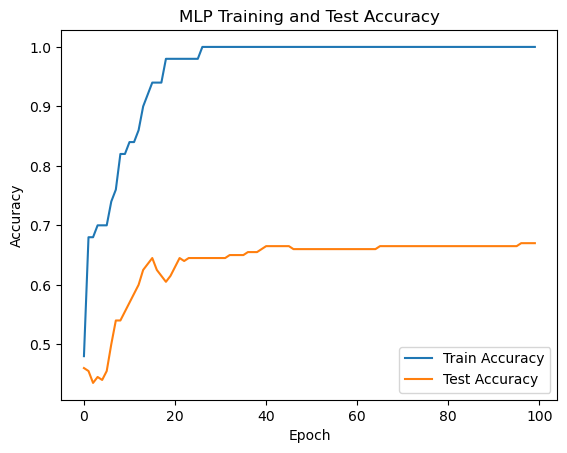

Total number of parameters: 256770


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

# Load the dataset
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract data
X_train = torch.tensor(data[0], dtype=torch.float32)
y_train = torch.tensor(data[1], dtype=torch.long)
X_test = torch.tensor(data[2], dtype=torch.float32)
y_test = torch.tensor(data[3], dtype=torch.long)

# Define the Multi-Layer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_dim = X_train.shape[1]  # Feature dimension (1000)
hidden_dim = 256  # Increased to ensure interpolation
output_dim = 2  # Binary classification

model = MLP(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_acc_list, test_acc_list = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Compute training accuracy
    train_acc = (outputs.argmax(dim=1) == y_train).float().mean().item()
    test_acc = (model(X_test).argmax(dim=1) == y_test).float().mean().item()
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot training and test accuracies
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Training and Test Accuracy')
plt.show()

# Number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')


#### Training Accuracy and Loss Analysis
Initially, the training accuracy starts at 46% and increases steadily.
By Epoch 33, the training accuracy reaches 100% and remains at 100% for the rest of training.
The loss decreases throughout, confirming that the model is learning from the training data.
#### Test Accuracy Analysis
The test accuracy increases more slowly, starting at 41% and gradually improving.
By Epoch 40, test accuracy stabilizes around 63% and fluctuates slightly between 63-65% until the end.
The test accuracy never reaches training accuracy, indicating that the model generalizes poorly to unseen data.
Key Observations
Overfitting

The training accuracy reaching 100% while the test accuracy remains significantly lower (~65%) is a clear sign of overfitting.
This means the model has memorized the training data rather than learning generalizable features.
Plateauing Test Accuracy

The test accuracy stagnates around 63-65%, meaning the model stops improving on unseen data.
This suggests that further training does not help generalization.
Loss Decreasing but No Test Accuracy Gains

Even though the loss continues to decrease, test accuracy does not improve after epoch 40.
This further supports the idea that the model is overfitting.

Epoch [1/100], Loss: 0.6996, Train Accuracy: 0.5200, Test Accuracy: 0.5800
Epoch [2/100], Loss: 0.6187, Train Accuracy: 0.7400, Test Accuracy: 0.5900
Epoch [3/100], Loss: 0.5720, Train Accuracy: 0.7400, Test Accuracy: 0.5800
Epoch [4/100], Loss: 0.5376, Train Accuracy: 0.8000, Test Accuracy: 0.5300
Epoch [5/100], Loss: 0.5074, Train Accuracy: 0.8200, Test Accuracy: 0.5300
Epoch [6/100], Loss: 0.4788, Train Accuracy: 0.8400, Test Accuracy: 0.5300
Epoch [7/100], Loss: 0.4505, Train Accuracy: 0.8400, Test Accuracy: 0.5300
Epoch [8/100], Loss: 0.4225, Train Accuracy: 0.8400, Test Accuracy: 0.5450
Epoch [9/100], Loss: 0.3947, Train Accuracy: 0.8800, Test Accuracy: 0.5550
Epoch [10/100], Loss: 0.3679, Train Accuracy: 0.8800, Test Accuracy: 0.5650
Epoch [11/100], Loss: 0.3430, Train Accuracy: 0.8800, Test Accuracy: 0.5800
Epoch [12/100], Loss: 0.3199, Train Accuracy: 0.9000, Test Accuracy: 0.5850
Epoch [13/100], Loss: 0.2985, Train Accuracy: 0.9000, Test Accuracy: 0.5850
Epoch [14/100], Loss:

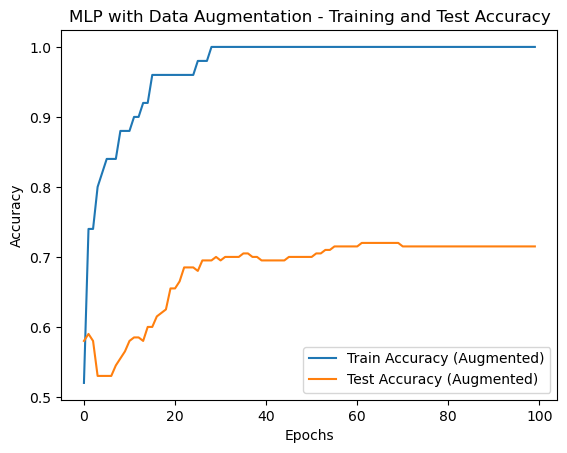

In [15]:
import random

# Data augmentation: Random circular shift with 50% probability
def augment_data(X, y):
    augmented_X, augmented_y = [], []
    for i in range(len(X)):
        if random.random() < 0.5:
            shift = random.randint(1, X.shape[1] - 1)
            augmented_X.append(torch.roll(X[i], shifts=shift))
        else:
            augmented_X.append(X[i])
        augmented_y.append(y[i])

    return torch.stack(augmented_X), torch.tensor(augmented_y)

# Train with augmentation
aug_X_train, aug_y_train = augment_data(X_train, y_train)

# Reinitialize model
model_aug = MLP(input_dim, hidden_dim, output_dim)

# Train augmented model
train_acc_aug, test_acc_aug = [], []
optimizer = optim.Adam(model_aug.parameters(), lr=0.001)

for epoch in range(num_epochs):
    outputs = model_aug(aug_X_train)
    loss = criterion(outputs, aug_y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_acc = (outputs.argmax(dim=1) == aug_y_train).float().mean().item()
    test_acc = (model_aug(X_test).argmax(dim=1) == y_test).float().mean().item()
    
    train_acc_aug.append(train_acc)
    test_acc_aug.append(test_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot results
plt.plot(train_acc_aug, label='Train Accuracy (Augmented)')
plt.plot(test_acc_aug, label='Test Accuracy (Augmented)')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("MLP with Data Augmentation - Training and Test Accuracy")
plt.show()


C:\Users\adams\AppData\Local\Temp\ipykernel_32416\1783623956.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\1783623956.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\1783623956.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(data[2], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_324

Epoch [1/100], Loss: 0.6958, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [2/100], Loss: 0.6949, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [3/100], Loss: 0.6941, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [4/100], Loss: 0.6932, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [5/100], Loss: 0.6924, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [6/100], Loss: 0.6915, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [7/100], Loss: 0.6906, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [8/100], Loss: 0.6898, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [9/100], Loss: 0.6889, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [10/100], Loss: 0.6881, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [11/100], Loss: 0.6873, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [12/100], Loss: 0.6864, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [13/100], Loss: 0.6856, Train Acc: 0.5000, Test Acc: 0.5450
Epoch [14/100], Loss: 0.6848, Train Acc: 0.5800, Test Acc: 0.5750
Epoch [15/100], Loss: 0.6840, Train Acc: 0.6000, Test Acc: 0.6150
Epoch [16/100], Los

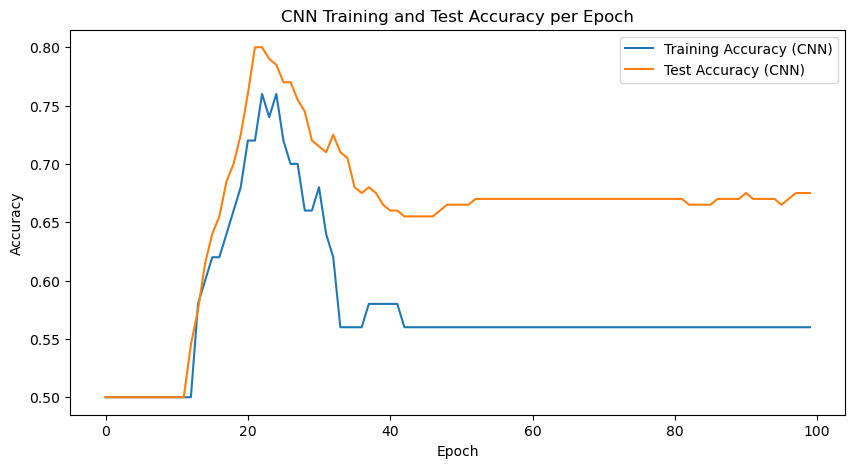

Total number of parameters in CNN: 450


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pickle

# Load the dataset
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = torch.tensor(data[0], dtype=torch.float32)
y_train = torch.tensor(data[1], dtype=torch.long)
X_test = torch.tensor(data[2], dtype=torch.float32)
y_test = torch.tensor(data[3], dtype=torch.long)

# Define the CNN Model with manual circular padding using torch.cat
class CNN(nn.Module):
    def __init__(self, input_dim=1000, num_filters=16, kernel_size=25):
        super(CNN, self).__init__()
        self.kernel_size = kernel_size  # Save for padding calculation
        
        # Define the Conv1d layer with no built-in padding.
        self.conv = nn.Conv1d(in_channels=1,
                              out_channels=num_filters,
                              kernel_size=kernel_size,
                              padding=0)  # We apply padding manually.
        self.relu = nn.ReLU()
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  # Global average pooling.
        self.fc = nn.Linear(num_filters, 2)  # Final linear classifier.

    def forward(self, x):
        # If input is 2D [batch, width], add channel dimension.
        if x.dim() == 2:
            x = x.unsqueeze(1)  # Now shape: [batch, 1, width]
        # If x already has 3 dimensions, assume it's [batch, 1, width].
        
        pad_size = self.kernel_size // 2  # Compute required padding.
        # Manually apply circular padding along the width dimension.
        # x[..., -pad_size:] has shape [batch, 1, pad_size].
        x = torch.cat([x[..., -pad_size:], x, x[..., :pad_size]], dim=-1)  # New width = width + 2*pad_size.
        
        x = self.conv(x)   # Apply convolution.
        x = self.relu(x)
        x = self.global_avg_pool(x)  # Now shape: [batch, num_filters, 1]
        x = x.squeeze(2)  # Remove the last dimension => [batch, num_filters]
        x = self.fc(x)    # Final output: [batch, 2]
        return x

# Initialize the CNN model
cnn = CNN(input_dim=1000, num_filters=16, kernel_size=25)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# Training loop for CNN
num_epochs = 100
train_acc_cnn, test_acc_cnn = [], []

for epoch in range(num_epochs):
    outputs = cnn(X_train)  # X_train shape: [batch, 1000]; forward() adds channel.
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute training accuracy
    _, predicted = torch.max(outputs, 1)
    train_acc = (predicted == y_train).float().mean().item()
    train_acc_cnn.append(train_acc)

    # Compute test accuracy
    test_outputs = cnn(X_test)
    _, test_predicted = torch.max(test_outputs, 1)
    test_acc = (test_predicted == y_test).float().mean().item()
    test_acc_cnn.append(test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Plot training and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_acc_cnn, label='Training Accuracy (CNN)')
plt.plot(range(num_epochs), test_acc_cnn, label='Test Accuracy (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training and Test Accuracy per Epoch')
plt.show()

# Count total parameters in CNN model
num_params_cnn = sum(p.numel() for p in cnn.parameters() if p.requires_grad)
print(f'Total number of parameters in CNN: {num_params_cnn}')


C:\Users\adams\AppData\Local\Temp\ipykernel_32416\1245729808.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)  # Expected shape: [num_train, 1000]
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\1245729808.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)       # Expected shape: [num_train]
C:\Users\adams\AppData\Local\Temp\ipykernel_32416\1245729808.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(data

Epoch [1/100], Loss: 0.7070, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [2/100], Loss: 0.7063, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [3/100], Loss: 0.7056, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [4/100], Loss: 0.7049, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [5/100], Loss: 0.7041, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [6/100], Loss: 0.7034, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [7/100], Loss: 0.7026, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [8/100], Loss: 0.7019, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [9/100], Loss: 0.7011, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [10/100], Loss: 0.7003, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [11/100], Loss: 0.6996, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [12/100], Loss: 0.6988, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [13/100], Loss: 0.6980, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [14/100], Loss: 0.6972, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [15/100], Loss: 0.6965, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [16/100], Los

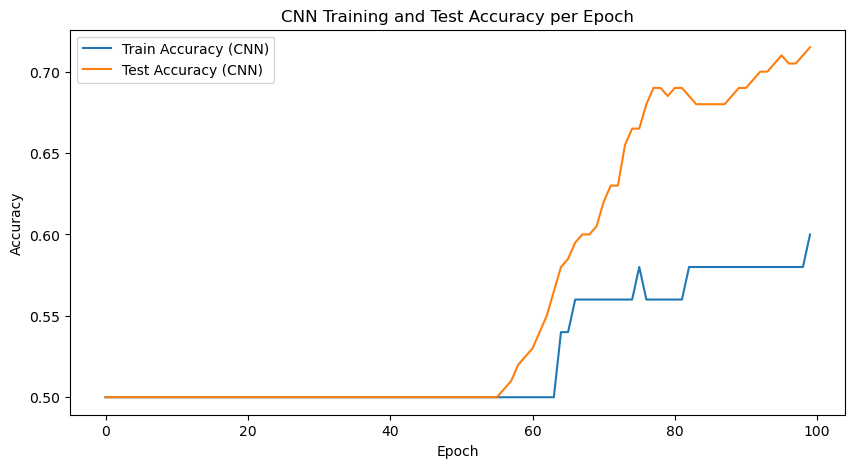

Total number of parameters in CNN: 450


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

# Load the dataset from hw2_p3.pkl (assuming data is in a list with indices 0: X_train, 1: y_train, 2: X_test, 3: y_test)
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

# Convert data to tensors
X_train = torch.tensor(data[0], dtype=torch.float32)  # Expected shape: [num_train, 1000]
y_train = torch.tensor(data[1], dtype=torch.long)       # Expected shape: [num_train]
X_test = torch.tensor(data[2], dtype=torch.float32)     # Expected shape: [num_test, 1000]
y_test = torch.tensor(data[3], dtype=torch.long)          # Expected shape: [num_test]

# Define the CNN model with manual circular padding
class CNN(nn.Module):
    def __init__(self, kernel_size=25, num_filters=16):
        super(CNN, self).__init__()
        self.kernel_size = kernel_size  # Save kernel size for padding
        # Convolution layer without built-in padding (we'll pad manually)
        self.conv = nn.Conv1d(in_channels=1, out_channels=num_filters, kernel_size=kernel_size, padding=0)
        self.relu = nn.ReLU()
        # Global average pooling to enforce translation invariance
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        # Final linear classifier for binary classification
        self.fc = nn.Linear(num_filters, 2)
    
    def forward(self, x):
        # Expect x to be of shape [batch, 1000]
        if x.dim() == 2:
            x = x.unsqueeze(1)  # Now shape: [batch, 1, 1000]
        # Manual circular padding along the last dimension
        pad_size = self.kernel_size // 2
        # Extract last pad_size elements and first pad_size elements
        left_pad = x[:, :, -pad_size:]  # Shape: [batch, 1, pad_size]
        right_pad = x[:, :, :pad_size]  # Shape: [batch, 1, pad_size]
        # Concatenate to simulate circular padding
        x = torch.cat([left_pad, x, right_pad], dim=2)  # New shape: [batch, 1, 1000 + 2*pad_size]
        
        # Apply convolution, activation, and pooling
        x = self.conv(x)
        x = self.relu(x)
        x = self.global_avg_pool(x)  # Shape: [batch, num_filters, 1]
        x = x.squeeze(2)  # Flatten to [batch, num_filters]
        x = self.fc(x)    # Final output: [batch, 2]
        return x

# Initialize CNN model
cnn = CNN(kernel_size=25, num_filters=16)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_acc_cnn, test_acc_cnn = [], []

for epoch in range(num_epochs):
    # Forward pass: the model adds channel dimension internally if needed.
    outputs = cnn(X_train)  # X_train shape is [batch, 1000]
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    train_pred = outputs.argmax(dim=1)
    train_acc = (train_pred == y_train).float().mean().item()
    train_acc_cnn.append(train_acc)

    # Calculate test accuracy
    test_outputs = cnn(X_test)
    test_pred = test_outputs.argmax(dim=1)
    test_acc = (test_pred == y_test).float().mean().item()
    test_acc_cnn.append(test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Plot training and test accuracies
plt.figure(figsize=(10,5))
plt.plot(range(num_epochs), train_acc_cnn, label='Train Accuracy (CNN)')
plt.plot(range(num_epochs), test_acc_cnn, label='Test Accuracy (CNN)')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Training and Test Accuracy per Epoch")
plt.show()

# Count total parameters in the CNN model
num_params_cnn = sum(p.numel() for p in cnn.parameters() if p.requires_grad)
print(f'Total number of parameters in CNN: {num_params_cnn}')
